In [1]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn import preprocessing
import csv
from statistics import mean, stdev

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [3]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.savefig('/home/jt/research/sc_vol_sa_feats', bbox_inches='tight')
    plt.show()

In [4]:
# get target areas from file
with open('target_areas.txt') as f:
    target_areas = f.readlines()
target_areas = map(str.strip, target_areas)
print(len(target_areas))

150


In [5]:
# get aseg data (volume) from file
with open('aseg_stats.txt') as f:
    aseg_data = f.readlines()
aseg_data = map(str.split, aseg_data)
print(aseg_data[0])

['Measure:volume', 'Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex', 'Left-Thalamus-Proper', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', '3rd-Ventricle', '4th-Ventricle', 'Brain-Stem', 'Left-Hippocampus', 'Left-Amygdala', 'CSF', 'Left-Accumbens-area', 'Left-VentralDC', 'Left-vessel', 'Left-choroid-plexus', 'Right-Lateral-Ventricle', 'Right-Inf-Lat-Vent', 'Right-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex', 'Right-Thalamus-Proper', 'Right-Caudate', 'Right-Putamen', 'Right-Pallidum', 'Right-Hippocampus', 'Right-Amygdala', 'Right-Accumbens-area', 'Right-VentralDC', 'Right-vessel', 'Right-choroid-plexus', '5th-Ventricle', 'WM-hypointensities', 'Left-WM-hypointensities', 'Right-WM-hypointensities', 'non-WM-hypointensities', 'Left-non-WM-hypointensities', 'Right-non-WM-hypointensities', 'Optic-Chiasm', 'CC_Posterior', 'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Anterior', 'BrainSegVol', 'BrainSegVolNotVent', 'Bra

In [6]:
#get lh aparc data (surface area) from file
with open('aparc_lh_area.txt') as f:
    aparc_lh_data = f.readlines();
aparc_lh_data = map(str.split, aparc_lh_data)
print(len(aparc_lh_data[0]))

38


In [7]:
#get rh aparc data (area) from file
with open('aparc_rh_area.txt') as f:
    aparc_rh_data = f.readlines();
aparc_rh_data = map(str.split, aparc_rh_data)
print(len(aparc_rh_data[0]))

38


In [8]:
# get indices of target areas in aseg data and get feature names
feature_names = []
aseg_target_indices = []
for i in range(0, len(aseg_data[0])):
    if aseg_data[0][i] in target_areas:
        aseg_target_indices.append(i)
        feature_names.append(aseg_data[0][i])
        
print(len(aseg_target_indices))

16


In [9]:
# get indices of target area in aparc data and get feature names
aparc_lh_target_indices = []
aparc_rh_target_indices = []
for i in range(0, len(aparc_lh_data[0])):
    if aparc_lh_data[0][i] in target_areas:
        aparc_lh_target_indices.append(i)
        feature_names.append(aparc_lh_data[0][i])
    if aparc_rh_data[0][i] in target_areas:
        aparc_rh_target_indices.append(i)
        feature_names.append(aparc_rh_data[0][i])

print(len(aparc_lh_target_indices))
print(len(aparc_rh_target_indices))

33
33


In [10]:
# make features for each patient, make patients & moca
target_aseg_data = []
target_aparc_data = []

patients = []
for i in aseg_data[1:]:
    patients.append(i[0])
    p = []
    for j in aseg_target_indices:
        p.append(i[j])
    target_aseg_data.append(p)

print(len(aparc_lh_data))
print(len(aparc_rh_data))
 
for i in range(1,len(aparc_lh_data)):
    if aparc_lh_data[i][0] in patients and aparc_rh_data[i][0] in patients:
        p = []
        for j in aparc_lh_target_indices:
            p.append(aparc_lh_data[i][j])
        for j in aparc_rh_target_indices:
            p.append(aparc_rh_data[i][j])
        target_aparc_data.append(p)
print(len(target_aparc_data))

304
304
303


In [11]:
print(len(patients))
print(len(target_aseg_data), len(target_aseg_data[0]))
print(len(target_aparc_data), len(target_aparc_data[0]))

303
(303, 16)
(303, 66)


In [12]:
#standarize and combine data

target_aseg_data_s = preprocessing.scale(target_aseg_data, axis=1)
target_aparc_data_s = preprocessing.scale(target_aparc_data, axis=1)

target_aseg_data_s = target_aseg_data_s.tolist()
target_aparc_data_s = target_aparc_data_s.tolist()

target_data = []
for i in range(0, len(target_aparc_data_s)):
    target_data.append(target_aseg_data_s[i] + target_aparc_data_s[i])
    
print(len(target_data), len(target_data[0]))

(303, 82)


In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# get moca scores, age, and sex for each patient - remove patients without
skipped_patients = []

mocas = patients[:]
age = patients[:]
sex = patients[:]

with open('Josh_finalChart.csv') as f:
    freader = csv.DictReader(f)
    for i in freader:
        
        if i['Subject'] in mocas:
            mocas[mocas.index(i['Subject'])] = i['First/Last Moca Diff']
        if i['Subject'] in age:
            age[age.index(i['Subject'])] = i['Age']
        if i['Subject'] in sex:
            sex[sex.index(i['Subject'])] = i['Sex']
        else:
            skipped_patients.append(i['Subject'])
        
more_skipped = [i for i in mocas if int(i)>3000]

for i in more_skipped:
    skipped_patients.append(i)

print(len(sex), len(age), len(mocas), len(skipped_patients))

(303, 303, 303, 61)


In [14]:
#remove patients with no moca / age / sex
for i in skipped_patients:
    cur = 0
    if i in patients:
        cur = patients.index(i)
        patients.pop(cur)
        target_data.pop(cur)
    if i in mocas:
        mocas.remove(i)
    if i in sex:
        sex.remove(i)
    if i in age:
        age.remove(i)

mocas = [int(i) for i in mocas]
mocas = np.asarray(mocas)
patients = np.asarray(patients)
target_data = np.asarray(target_data)
age = np.asarray(age)
sex = np.asarray(sex)

# remove all patients that aren't relevant to experiment 
# moca = 0 -> cognitvely stable patient, moca<=-2 -> cognitvely declining patient
patients = patients[np.logical_or(mocas==0, mocas<=-2)]
target_data = target_data[np.logical_or(mocas==0, mocas<=-2)]
age = age[np.logical_or(mocas==0, mocas<=-2)]
sex = sex[np.logical_or(mocas==0, mocas<=-2)]
mocas = mocas[np.logical_or(mocas==0, mocas<=-2)]

print(len(patients), len(mocas), len(age), len(sex))

# convert sex to numerical value
for i in range(0, len(sex)):
    if sex[i] == 'M':
        sex[i] = 0
    else:
        sex[i] = 1 

(164, 164, 164, 164)


In [15]:
# scale age and sex, then append to features
target_data = target_data.tolist()

age = preprocessing.scale(age)
sex = preprocessing.scale(sex)
for i in range(0, len(target_data)):
    target_data[i].append(age[i])
    target_data[i].append(sex[i])   

feature_names.append('Age')
feature_names.append('Sex')

/home/jt/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype |S2 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/jt/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype |S1 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [16]:
# create classes for mocas
# class 0: =0, class 1: <= -2

for i in range(0,len(mocas)):
    if mocas[i] == 0:
        mocas[i] = 0
    elif mocas[i] <= -2:
        mocas[i] = 1

print(mocas)
print(len(mocas), len(patients), len(target_data), len(target_data[0]))

[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1]
(164, 164, 164, 84)


All folds
0.6829268292682927


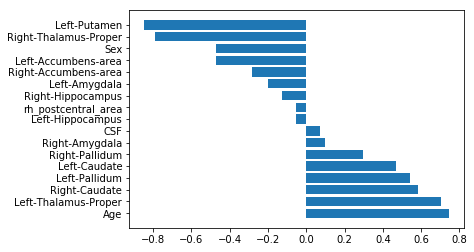

In [17]:
# train model
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
y_allPred = []
y_allVal = []
foldNumber = 0

target_data = np.asarray(target_data)

for train_index, val_index in skfold.split(target_data, mocas):

    X_foldtrain, X_foldval = target_data[train_index], target_data[val_index]
    y_foldtrain, y_foldval = mocas[train_index], mocas[val_index]

    #print(foldNumber,)
    foldNumber+=1

    sm = SMOTE()
    X_train_res, y_train_res = sm.fit_sample(X_foldtrain, y_foldtrain)

    #first SVM
    clf = svm.SVC(gamma='auto', kernel='linear', decision_function_shape='ovo')
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_foldval)
    y_allPred = np.append(y_allPred, y_pred)
    y_allVal = np.append(y_allVal, y_foldval)
    #print (accuracy_score(y_foldval, y_pred))

print("All folds")
print(accuracy_score(y_allVal, y_allPred))

relevant_feats = [i for i in clf.coef_[0] if (i>.05 or i<-.05)]
relevant_feat_names = [feature_names[i] for i in range(0,len(clf.coef_[0])) 
                       if (clf.coef_[0][i]>.05 or clf.coef_[0][i]<-.05)]

f_importances(relevant_feats, relevant_feat_names)

Confusion matrix, without normalization
[[38 28]
 [24 74]]


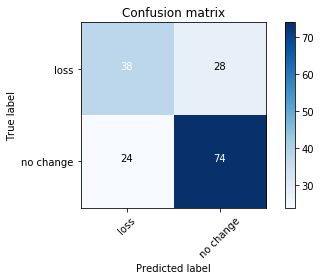

In [18]:
plot_confusion_matrix(confusion_matrix(y_allVal, y_allPred), classes=['loss','no change'])